# **SAE 15**

**Où en sont les expérimentations sur la 5G ?**

*Toutes les informations présentées dans ce bilan proviennent d'un jeu de données publié par l'ARCEP, répertoriant les expérimentations actuellement menées en France autour de l'utilisation de la 5G.*


### **Tableau 1 : Implication régionale et entreprises les plus présentes**


In [3]:
import csv
import pandas as pd
from tkinter import *
from tkinter import ttk

fenetre = Tk()
fenetre.title("Tableau des acteurs engagés par région")
colonne = ("Région", "Acteurs engagés")
tableau = ttk.Treeview(fenetre, columns=colonne, show="headings")
tableau.column("Région", width=200)
tableau.column("Acteurs engagés", width=800)
tableau.heading("Région",text="Région")
tableau.heading("Acteurs engagés",text="Acteurs engagés")
# Création d'un dictionnaire qui va contenir une liste d'entreprises pour chaque région
regions_dict ={}
# Ouverture du fichier CSV
with open('experimentations_5G.csv', newline='', encoding='cp1252') as file:
    read = csv.reader(file, delimiter=';')
    # Parcours du fichier CSV ligne par ligne
    for i, row in enumerate(read):
        if i!=0:
            entreprise = row[0]  # Entreprise (colonne 0)
            lat=float(row[6].replace(',','.'))
            lon=float(row[7].replace(',','.'))
            if row[11]!='':
                region = row[11]     # Région (colonne 11)
            else : 
                region= row[10]
            # Ajouter l'entreprise à la liste correspondant à la région
            if region not in regions_dict :
                regions_dict[region]=[]
            if entreprise not in regions_dict[region]:
                regions_dict[region].append(entreprise)
df = pd.DataFrame({
    'Région': regions_dict.keys(),
    'Acteurs engagés': regions_dict.values()
})

df = df.sort_values(by='Région').reset_index(drop=True)
for index, row in df.iterrows():
    region = row['Région']
    entreprises = ", ".join(row['Acteurs engagés'])
    tableau.insert("", "end", values=(region, entreprises))

tableau.pack(padx=20, pady=20)
fenetre.mainloop()


Ce **tableau** met en évidence le **niveau d'implication des différentes régions** et les **entreprises** qui y sont **les plus actives**. 

On remarque que des entreprises comme **B-COM**, **Axians**, ou **Orange** sont particulièrement présentes et actives, avec une couverture qui s'étend **à l'ensemble du territoire français**.


### **Graphique 1 : Nombre d'expérimentations 5G par région**



Index(['Expérimentateur', 'Bande de fréquences',
       'Fréquences attribuées (limite basse)',
       'Fréquences attribuées (limite haute)',
       'Numéro de la décision d'autorisation de l'Arcep',
       'Lien de la décision d'autorisation de l'Arcep', 'Latitude',
       'Longitude', 'Code INSEE', 'Commune', 'Département', 'Région', 'Début',
       'Fin', 'Description', 'Techno - Massive MIMO',
       'Techno - Beamforming/beamtracking',
       'Techno - Duplexage temporel (mode TDD)',
       'Techno - Mode de fonctionnement NSA (Non Stand Alone)',
       'Techno - Mode de fonctionnement SA (Stand Alone)',
       'Techno - Synchronisation de réseaux', 'Techno - Network slicing',
       'Techno - Small cells', 'Techno - Accès dynamique au spectre',
       'Techno - 5G, 6G…', 'Usage - Mobilité connectée',
       'Usage - Internet des objets', 'Usage - Ville intelligente',
       'Usage - Réalité virtuelle', 'Usage - Télémédecine',
       'Usage - Industrie du futur', 'Usage - Techniq

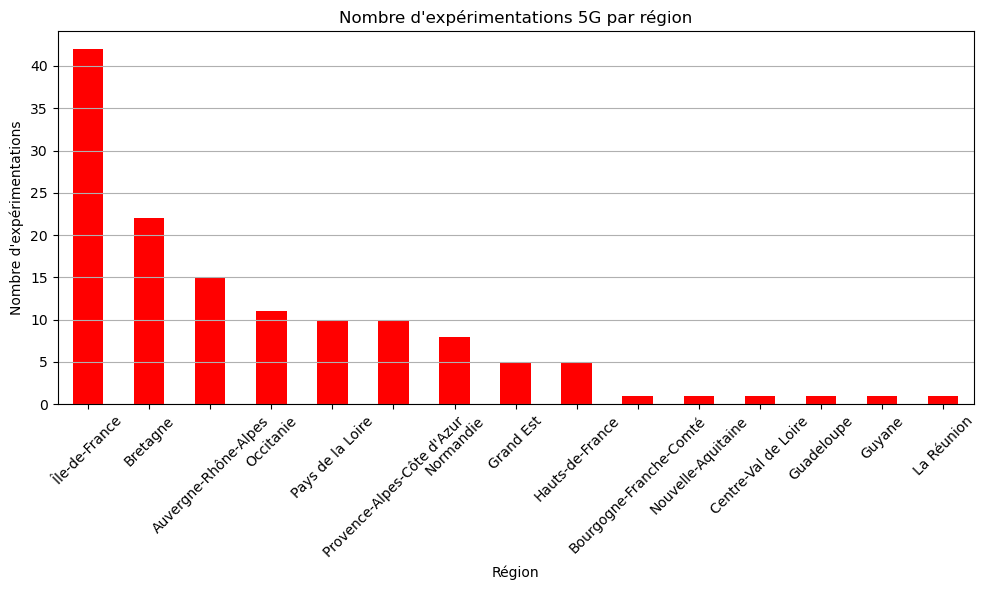

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données avec les paramètres spécifiques
file_path = 'experimentations_5G.csv'
data = pd.read_csv(file_path, encoding='cp1252', sep=';', quotechar='"')

# Vérifier les colonnes disponibles
print(data.columns)

# Exemple : Compter le nombre d'expérimentations par région
experiments_by_region = data['Région'].value_counts()

# Créer un histogramme
plt.figure(figsize=(10, 6))
experiments_by_region.plot(kind='bar', color='red')
plt.title('Nombre d\'expérimentations 5G par région')
plt.xlabel('Région')
plt.ylabel('Nombre d\'expérimentations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

Ce graphique met en évidence que **l'Île-de-France et la Bretagne se démarquent nettement** en matière d'**expérimentations 5G**. Ces deux régions affichent un engagement marqué dans les **domaines des réseaux et des télécommunications**.

- **Île-de-France** : Avec plus de **40 expérimentations**, cette région se distingue en grande partie grâce au **nombre élevé d'entreprises** implantées sur son territoire.  
- **Bretagne** : Avec plus de **20 expérimentations**, la Bretagne conforte son statut de **berceau des télécommunications**. Elle a également investi plus de **15 millions d'euros** entre **2018 et 2021** pour renforcer cette position.

Ces chiffres reflètent le dynamisme de ces régions dans le développement et l'expérimentation des technologies 5G.


### **Graphique 2 : Répartition des sites par entreprise**

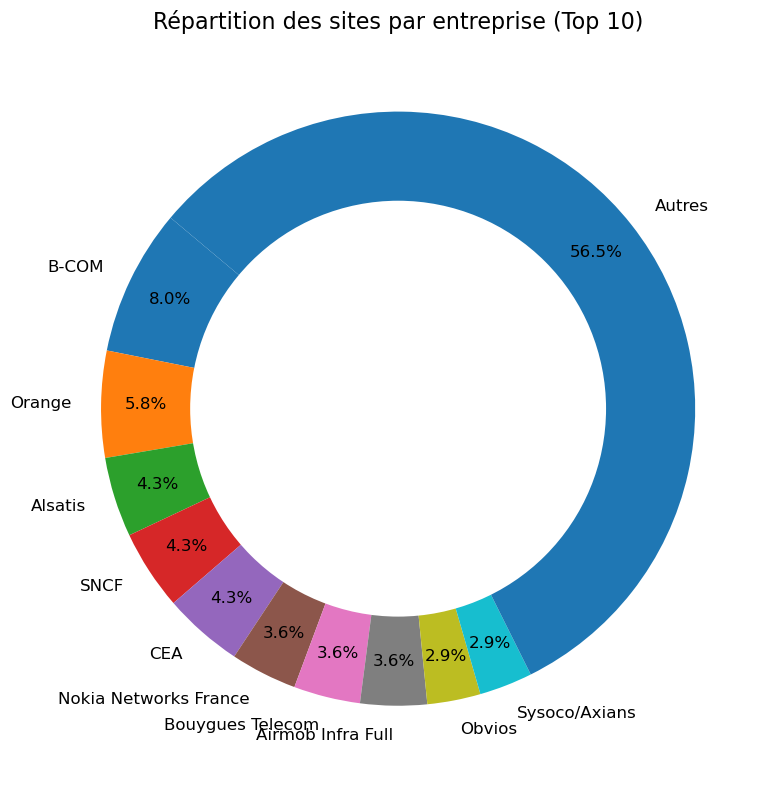

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
data = pd.read_csv('experimentations_5G.csv', encoding='cp1252', sep=';', quotechar='"')

# Compter les sites par entreprise
site_counts = data.groupby('Expérimentateur').size().reset_index(name='Nombre de sites')

# Trier les entreprises par nombre de sites (ordre décroissant)
site_counts = site_counts.sort_values(by='Nombre de sites', ascending=False)

# Sélectionner les 10 premières entreprises pour le camembert
top_companies = site_counts[:10]
other_sites_count = site_counts['Nombre de sites'][10:].sum()

# Ajouter une catégorie "Autres" pour regrouper les entreprises restantes
labels = list(top_companies['Expérimentateur']) + ['Autres']
sizes = list(top_companies['Nombre de sites']) + [other_sites_count]

# Couleurs personnalisées pour une meilleure distinction
colors = plt.cm.tab10.colors[:len(labels)]

# Tracer le camembert
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    pctdistance=0.85  # Ajuste la position des pourcentages
)

# Ajouter un cercle pour créer un effet de "donut"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Titre et style
plt.title('Répartition des sites par entreprise (Top 10)', fontsize=16)
plt.tight_layout()
plt.show()

Ce graphique illustre la répartition des sites parmi les entreprises ayant le plus grand nombre d'implantations en France. 

- **B-COM** et **Orange** se distinguent en tête en termes d'implémentation :  
  - **B-COM** compte **11 sites**,  
  - **Orange** en compte **8**.  
Ces deux entreprises sont les plus présentes à l'échelle nationale.


### **Graphique 3 : Technologies les plus utilisées par les expérimentateurs**

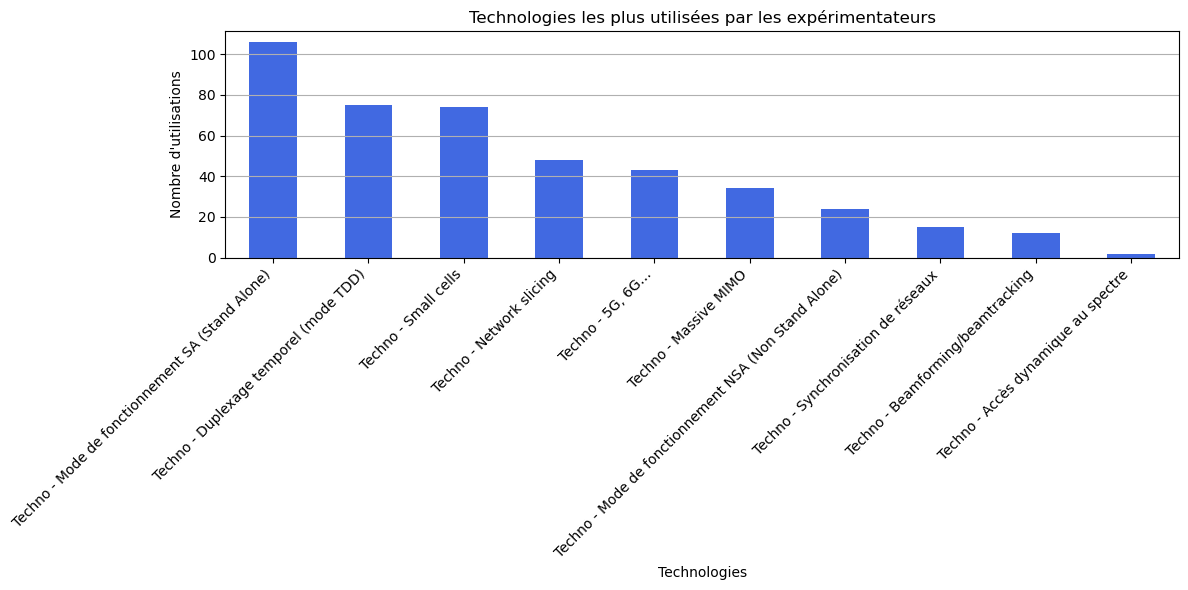

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = 'experimentations_5G.csv'  # Assurez-vous que le fichier est dans le même répertoire ou précisez son chemin complet
data = pd.read_csv(file_path, encoding='cp1252', sep=';', quotechar='"')

# Sélectionner les colonnes concernant les technologies
tech_columns = [col for col in data.columns if 'Techno' in col]

# Compter le nombre d'expérimentateurs utilisant chaque technologie
tech_usage = data[tech_columns].sum()

# Trier les technologies par utilisation
tech_usage_sorted = tech_usage.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
tech_usage_sorted.plot(kind='bar', color='royalblue')
plt.title('Technologies les plus utilisées par les expérimentateurs')
plt.xlabel('Technologies')
plt.ylabel("Nombre d'utilisations")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

De nombreuses entreprises réalisent des expérimentations, et il est possible d'observer une variation dans l'utilisation des différentes technologies. 

- **Mode de fonctionnement SA (Stand Alone)** : C'est la technologie la plus utilisée. Elle repose sur un réseau 5G qui dispose de ses propres installations, sans dépendance aux réseaux 4G existants.  
- **Duplexage temporel (mode TDD)** : Cette technologie permet la transmission bidirectionnelle des données sur un même canal de communication, en partageant le temps d'utilisation entre les transmissions montantes (uplink) et descendantes (downlink).  
- **Small cells** : Il s'agit de points d'accès à un réseau de télécommunications mobiles.

À titre de comparaison, la technologie **Stand Alone** est utilisée plus de **deux fois** plus souvent que les expérimentations concernant les technologies **5G** et **6G**.


### Tableau 2 : Orientation prises par région